In [72]:
import pandas as pd

data_file = "20240056.xlsx" 
df = pd.read_excel(data_file)
df = df[df['Master'] == 'Master Protein']

# 删除Gene Symbol列中值为NaN的行
df = df.dropna(subset=['Gene Symbol'])

# Make "Gene Symbol" unique and aggregate the data if there are duplicates
df = df.groupby('Gene Symbol', as_index=False).sum()

In [73]:
df  = df.rename({"Abundance: F2: Sample": "1 × 10^2", "Abundance: F3: Sample": "5 × 10^2", "Abundance: F4: Sample": "1 × 10^3",
                                          "Abundance: F5: Sample": "5 × 10^3", "Abundance: F6: Sample": "1 × 10^4", "Abundance: F7: Sample": "5 × 10^4",
                                          "Abundance: F8: Sample": "1 × 10^5"})


df

,Gene Symbol,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,...,Abundance: F8: Sample,Found in Sample: [S2] F2: Sample,Found in Sample: [S3] F3: Sample,Found in Sample: [S4] F4: Sample,Found in Sample: [S5] F5: Sample,Found in Sample: [S6] F6: Sample,Found in Sample: [S7] F7: Sample,Found in Sample: [S8] F8: Sample,# Protein Groups,Modifications
0,A2M,0.0,High,Master Protein,P01023,Alpha-2-macroglobulin OS=Homo sapiens OX=9606 ...,0.002,2.645,1,1,...,1507291.25,Peak Found,Not Found,Not Found,Peak Found,Peak Found,Peak Found,High,1.0,0
1,A2ML1,0.0,High,Master Protein,A8K2U0,Alpha-2-macroglobulin-like protein 1 OS=Homo s...,0,13.922,4,4,...,2662572.25,Peak Found,Peak Found,Peak Found,Peak Found,High,Peak Found,Peak Found,1.0,0
2,AAAS,0.0,High,Master Protein,Q9NRG9,Aladin OS=Homo sapiens OX=9606 GN=AAAS PE=1 SV=1,0,27.945,23,8,...,34034223.5625,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0
3,AACS,0.0,High,Master Protein,Q86V21,Acetoacetyl-CoA synthetase OS=Homo sapiens OX=...,0,5.462,3,2,...,5524274.5,Not Found,Not Found,Not Found,Not Found,Peak Found,Peak Found,High,1.0,0
4,AAGAB,0.0,High,Master Protein,Q6PD74,Alpha- and gamma-adaptin-binding protein p34 O...,0,10.95,9,3,...,19925453.71875,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,hEMMPRIN,0.0,High,Master Protein,Q54A51,Basigin OS=Homo sapiens OX=9606 GN=hEMMPRIN PE...,0,78.005,48,9,...,224578171.5,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0
4621,hfzo1,0.0,High,Master Protein,Q4AEJ3,Mitochondrial transmembrane GTPase Fzo-1 OS=Ho...,0,24.36,10,5,...,10438819.75,Not Found,Peak Found,Not Found,Peak Found,High,High,High,1.0,0
4622,p38,0.0,High,Master Protein,A0A510GDE6,Mitogen-activated protein kinase p38 (Fragment...,0,4.379,83,1,...,0,Not Found,Not Found,Not Found,High,High,Peak Found,Not Found,1.0,0
4623,seTCTP,0.0,High,Master Protein,A0A0P1J1R0,Translationally-controlled tumor protein OS=Ho...,0,69.68,72,7,...,219586423.96875,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0


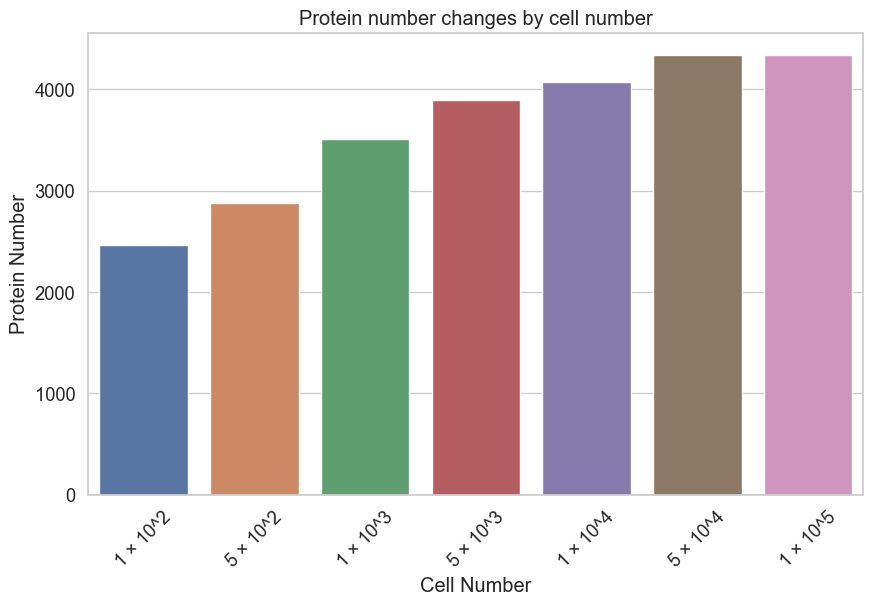

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = [f"Abundance: F{i}: Sample" for i in range(2,9)]

data_to_plot = df[columns_to_plot]

row_sums = data_to_plot.sum(axis=1)

filtered_data = data_to_plot[row_sums >= 10000]

positive_counts = (filtered_data > 0).sum(axis=0)

positive_counts = positive_counts.rename({"Abundance: F2: Sample": "1 × 10^2", "Abundance: F3: Sample": "5 × 10^2", "Abundance: F4: Sample": "1 × 10^3",
                                          "Abundance: F5: Sample": "5 × 10^3", "Abundance: F6: Sample": "1 × 10^4", "Abundance: F7: Sample": "5 × 10^4",
                                          "Abundance: F8: Sample": "1 × 10^5"})


sns.set(style="whitegrid", font_scale=1.2, rc={"font.family": "Arial"})

plt.figure(figsize=(10, 6))  
sns.barplot(x=positive_counts.index, y=positive_counts.values)
plt.xlabel("Cell Number")
plt.ylabel("Protein Number")
plt.title("Protein number changes by cell number")
plt.xticks(rotation=45) 
plt.show()

In [75]:

# Create empty lists for each "Abundance: FX: Sample" column
gene_symbol_lists = [[] for _ in range(2, 9)]  # Lists for columns F2 to F8

# Iterate over each row and add "Gene Symbol" to respective list if the corresponding "Abundance: FX: Sample" is not 0
for index, row in df.iterrows():
    for i, col_name in enumerate([f"Abundance: F{i}: Sample" for i in range(2, 9)]):
        if row[col_name] != 0:
            gene_symbol_lists[i].append(row['Gene Symbol'])


In [76]:
gene_symbol_lists = [set(gene_symbols) for gene_symbols in gene_symbol_lists]

difference_lst = []
difference_ctrl_lst = []

for i in range(len(gene_symbol_lists)-1):
  difference = gene_symbol_lists[i+1] - gene_symbol_lists[i]
  difference_ctrl = gene_symbol_lists[i] - gene_symbol_lists[i+1]
  difference_lst.append(difference)
  difference_ctrl_lst.append(difference_ctrl)
  


c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


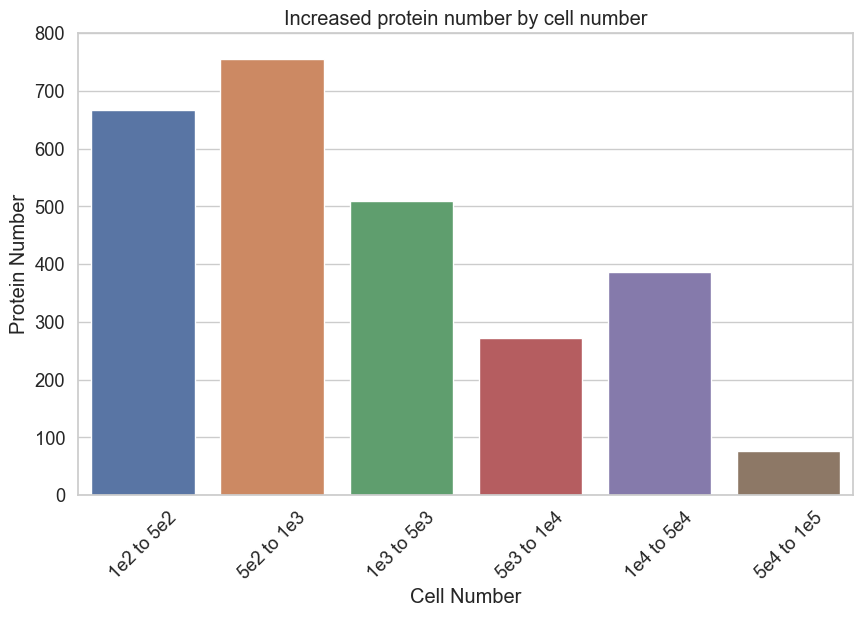

In [77]:
# positive
cell_ranges = ["1e2 to 5e2", "5e2 to 1e3", "1e3 to 5e3", "5e3 to 1e4", "1e4 to 5e4","5e4 to 1e5"]

difference_num_plus = [len(i) for i in difference_lst]

sns.set(style="whitegrid", font_scale=1.2, rc={"font.family": "Arial"})

plt.figure(figsize=(10, 6))  
sns.barplot(x=cell_ranges, y=difference_num_plus)
plt.ylim(0,800)
plt.xlabel("Cell Number")
plt.ylabel("Protein Number")
plt.title("Increased protein number by cell number")
plt.xticks(rotation=45) 
plt.show()

c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


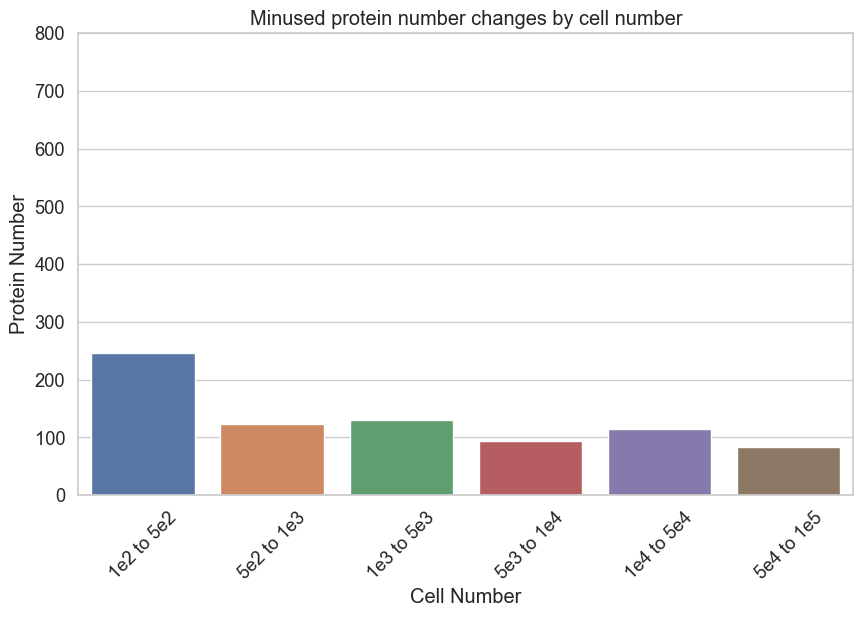

In [78]:
# negative

cell_ranges = ["1e2 to 5e2", "5e2 to 1e3", "1e3 to 5e3", "5e3 to 1e4", "1e4 to 5e4","5e4 to 1e5"]

difference_num_minus = [len(i) for i in difference_ctrl_lst]

sns.set(style="whitegrid", font_scale=1.2, rc={"font.family": "Arial"})

plt.figure(figsize=(10, 6))  
sns.barplot(x=cell_ranges, y=difference_num_minus)
plt.ylim(0,800)
plt.xlabel("Cell Number")
plt.ylabel("Protein Number")
plt.title("Minused protein number changes by cell number")
plt.xticks(rotation=45) 
plt.show()

In [79]:
for idx, difference in enumerate(difference_lst):
    difference = list(difference)
    df_diff = pd.DataFrame({'Gene Symbol': difference})
    df_diff.to_csv(f'difference_{idx+1}.csv', index=False,header=False)


In [80]:
# shared components

gene_symbol_lists = [set(gene_symbols) for gene_symbols in gene_symbol_lists]

shared_components = gene_symbol_lists[0]

for i in range(len(gene_symbol_lists)-1):
    shared_components = shared_components & gene_symbol_lists[i+1]

len(shared_components)


2045

In [81]:
df

,Gene Symbol,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,...,Abundance: F8: Sample,Found in Sample: [S2] F2: Sample,Found in Sample: [S3] F3: Sample,Found in Sample: [S4] F4: Sample,Found in Sample: [S5] F5: Sample,Found in Sample: [S6] F6: Sample,Found in Sample: [S7] F7: Sample,Found in Sample: [S8] F8: Sample,# Protein Groups,Modifications
0,A2M,0.0,High,Master Protein,P01023,Alpha-2-macroglobulin OS=Homo sapiens OX=9606 ...,0.002,2.645,1,1,...,1507291.25,Peak Found,Not Found,Not Found,Peak Found,Peak Found,Peak Found,High,1.0,0
1,A2ML1,0.0,High,Master Protein,A8K2U0,Alpha-2-macroglobulin-like protein 1 OS=Homo s...,0,13.922,4,4,...,2662572.25,Peak Found,Peak Found,Peak Found,Peak Found,High,Peak Found,Peak Found,1.0,0
2,AAAS,0.0,High,Master Protein,Q9NRG9,Aladin OS=Homo sapiens OX=9606 GN=AAAS PE=1 SV=1,0,27.945,23,8,...,34034223.5625,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0
3,AACS,0.0,High,Master Protein,Q86V21,Acetoacetyl-CoA synthetase OS=Homo sapiens OX=...,0,5.462,3,2,...,5524274.5,Not Found,Not Found,Not Found,Not Found,Peak Found,Peak Found,High,1.0,0
4,AAGAB,0.0,High,Master Protein,Q6PD74,Alpha- and gamma-adaptin-binding protein p34 O...,0,10.95,9,3,...,19925453.71875,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,hEMMPRIN,0.0,High,Master Protein,Q54A51,Basigin OS=Homo sapiens OX=9606 GN=hEMMPRIN PE...,0,78.005,48,9,...,224578171.5,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0
4621,hfzo1,0.0,High,Master Protein,Q4AEJ3,Mitochondrial transmembrane GTPase Fzo-1 OS=Ho...,0,24.36,10,5,...,10438819.75,Not Found,Peak Found,Not Found,Peak Found,High,High,High,1.0,0
4622,p38,0.0,High,Master Protein,A0A510GDE6,Mitogen-activated protein kinase p38 (Fragment...,0,4.379,83,1,...,0,Not Found,Not Found,Not Found,High,High,Peak Found,Not Found,1.0,0
4623,seTCTP,0.0,High,Master Protein,A0A0P1J1R0,Translationally-controlled tumor protein OS=Ho...,0,69.68,72,7,...,219586423.96875,Peak Found,Peak Found,Peak Found,High,High,High,High,1.0,0


c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

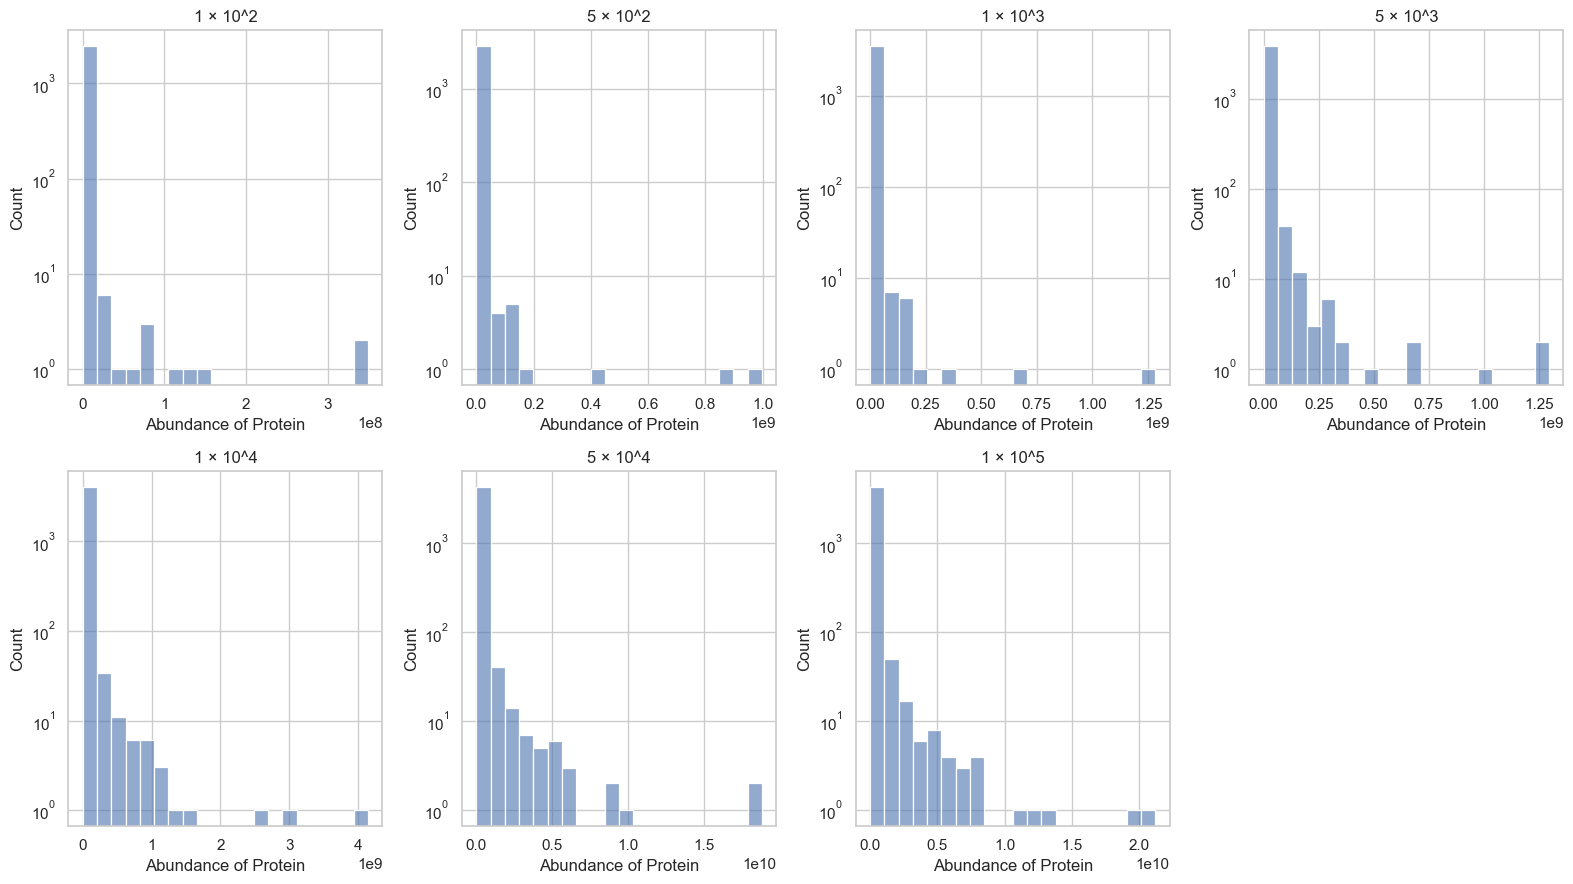

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建子图布局
fig, axs = plt.subplots(2, 4, figsize=(16, 9))

# 对应的标题字典
title_mapping = {"Abundance: F2: Sample": "1 × 10^2", 
                 "Abundance: F3: Sample": "5 × 10^2", 
                 "Abundance: F4: Sample": "1 × 10^3",
                 "Abundance: F5: Sample": "5 × 10^3", 
                 "Abundance: F6: Sample": "1 × 10^4", 
                 "Abundance: F7: Sample": "5 × 10^4",
                 "Abundance: F8: Sample": "1 × 10^5"}

for i in range(2, 9):
    data = df.loc[df[f"Abundance: F{i}: Sample"] != 0, f"Abundance: F{i}: Sample"]
    row_index = (i - 2) // 4
    col_index = (i - 2) % 4

    sns.histplot(data, bins=20, ax=axs[row_index, col_index], alpha=0.6) 
    axs[row_index, col_index].set_title(title_mapping[f"Abundance: F{i}: Sample"])  # 设置对应的标题
    axs[row_index, col_index].set_yscale('log')
    axs[row_index, col_index].set_xlabel("Abundance of Protein")  # 设置 x 轴标签

plt.tight_layout() 

axs[1, 3].set_visible(False) 
plt.show()


c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

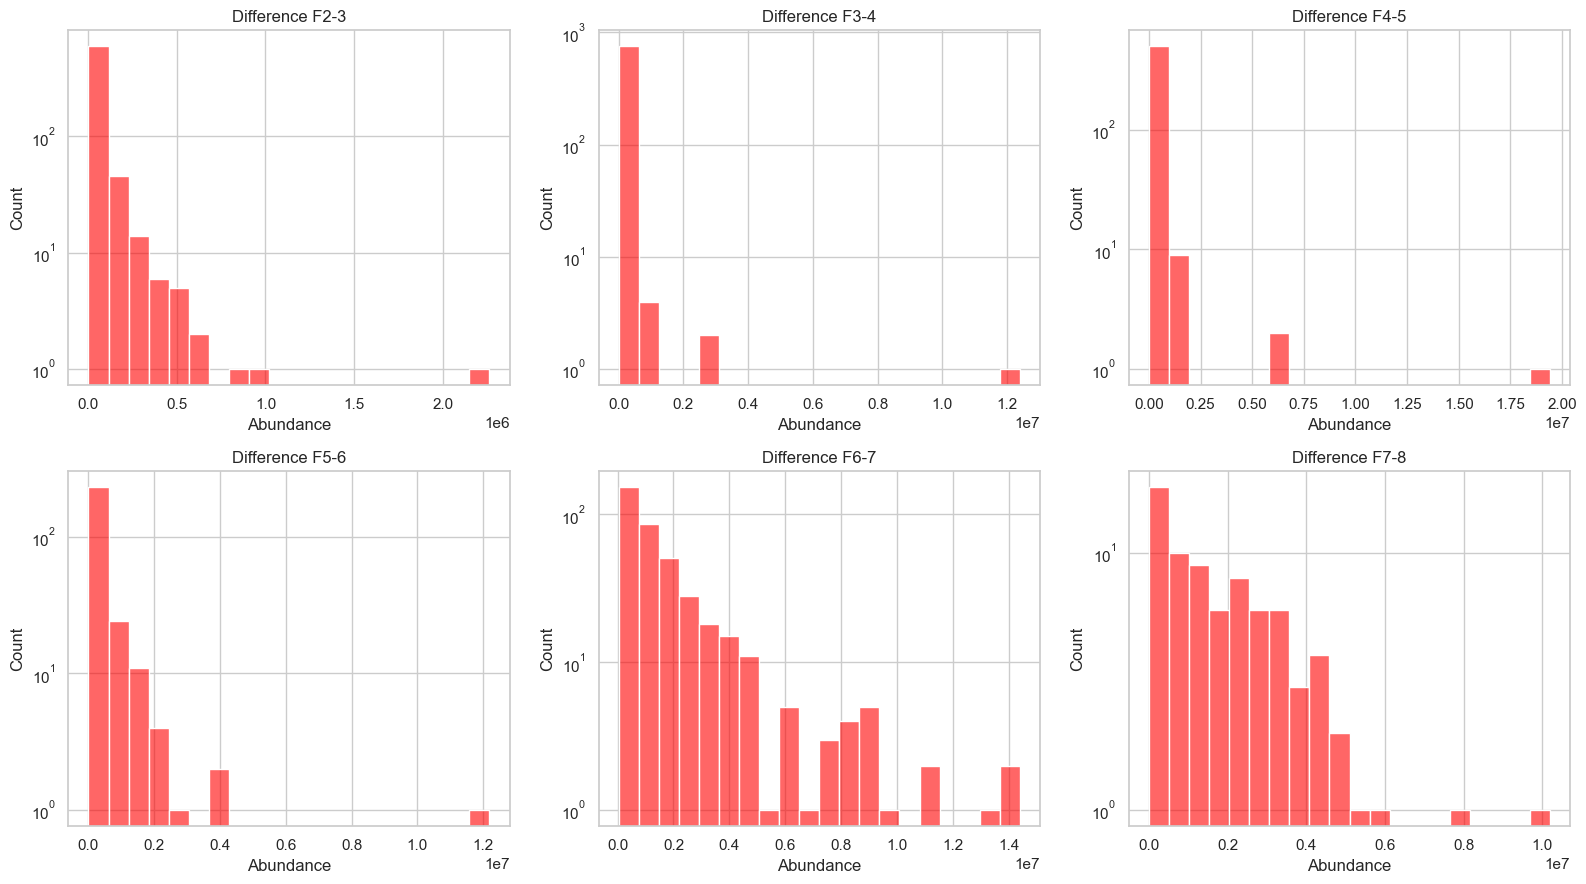

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表样式
sns.set(style="whitegrid")

# 创建子图布局
fig, axs = plt.subplots(2, 3, figsize=(16, 9))



for i, difference in enumerate(difference_lst):
    data = df.loc[df['Gene Symbol'].isin(difference), f"Abundance: F{i+3}: Sample"]  
    row_index = i // 3
    col_index = i % 3
    sns.histplot(data, bins=20, ax=axs[row_index, col_index], alpha=0.6, color='red')  # 使用调色板中的颜色
    axs[row_index, col_index].set_title(f"Difference F{i+2}-{i+3}")
    axs[row_index, col_index].set_yscale('log')
    axs[row_index, col_index].set_xlabel("Abundance")

plt.tight_layout() 
plt.show()


c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zgx\anaconda3\envs\scanpy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

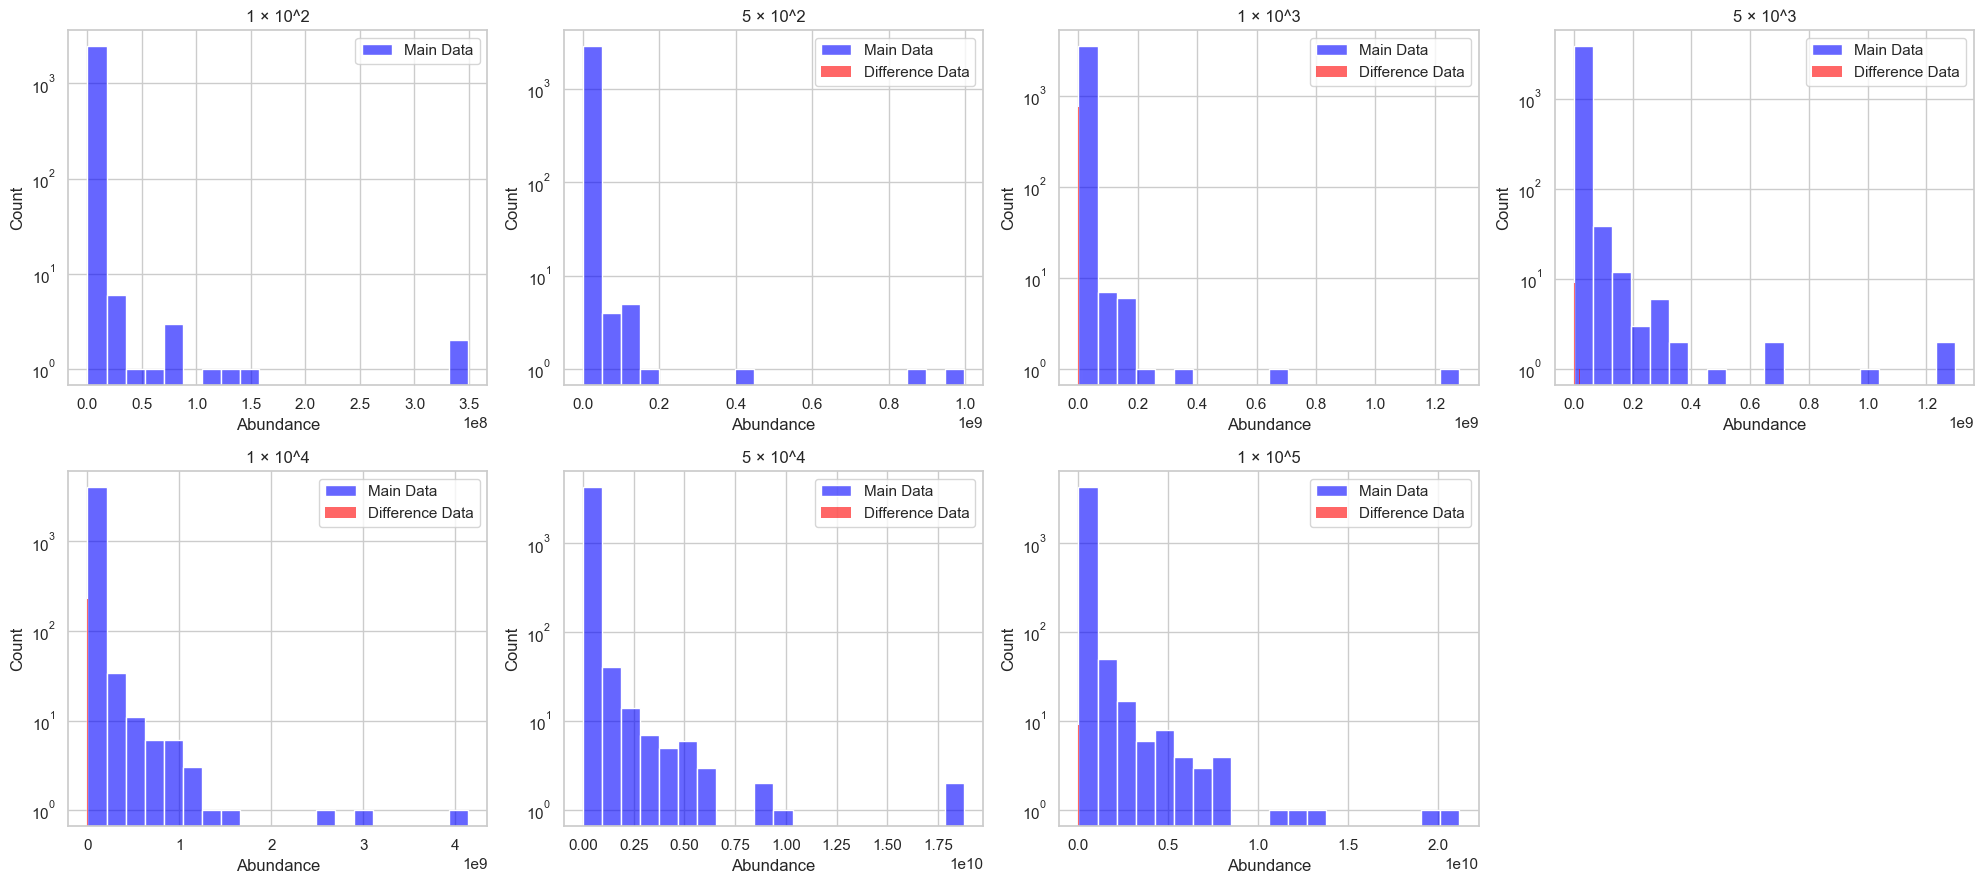

In [84]:
# draw them together

import seaborn as sns
import matplotlib.pyplot as plt

# 创建子图布局
fig, axs = plt.subplots(2, 4, figsize=(20, 9))

# 对应的标题字典
title_mapping = {
    "Abundance: F2: Sample": "1 × 10^2", 
    "Abundance: F3: Sample": "5 × 10^2", 
    "Abundance: F4: Sample": "1 × 10^3",
    "Abundance: F5: Sample": "5 × 10^3", 
    "Abundance: F6: Sample": "1 × 10^4", 
    "Abundance: F7: Sample": "5 × 10^4",
    "Abundance: F8: Sample": "1 × 10^5"
}

# 绘制图形
for i in range(2, 9):
    # 绘制第一组数据
    data_main = df.loc[df[f"Abundance: F{i}: Sample"] != 0, f"Abundance: F{i}: Sample"]
    row_index = (i - 2) // 4
    col_index = (i - 2) % 4

    sns.histplot(data_main, bins=20, ax=axs[row_index, col_index], alpha=0.6, color="blue", label="Main Data") 
    axs[row_index, col_index].set_title(title_mapping[f"Abundance: F{i}: Sample"])
    axs[row_index, col_index].set_yscale('log')
    axs[row_index, col_index].set_xlabel("Abundance")

    
    if i - 3 >= 0:
        data_difference = df.loc[df['Gene Symbol'].isin(difference_lst[i - 3]), f"Abundance: F{i}: Sample"]
        sns.histplot(data_difference, bins=20, ax=axs[row_index, col_index], alpha=0.6, color="red", label="Difference Data")

    # 添加图注
    axs[row_index, col_index].legend()

axs[1, 3].set_visible(False) 

plt.tight_layout()
plt.show()


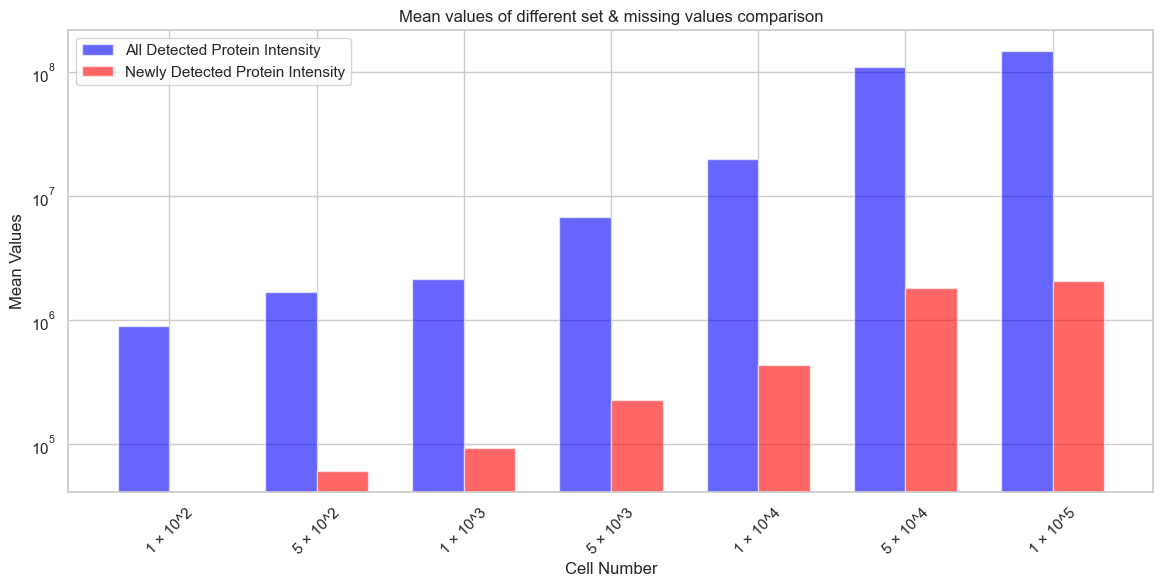

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `title_mapping` is defined as provided
title_mapping = {
    "Abundance: F2: Sample": "1 × 10^2", 
    "Abundance: F3: Sample": "5 × 10^2", 
    "Abundance: F4: Sample": "1 × 10^3",
    "Abundance: F5: Sample": "5 × 10^3", 
    "Abundance: F6: Sample": "1 × 10^4", 
    "Abundance: F7: Sample": "5 × 10^4",
    "Abundance: F8: Sample": "1 × 10^5"
}

mean_values = []
for i in range(2, 9):
    data_main = df.loc[df[f"Abundance: F{i}: Sample"] != 0, f"Abundance: F{i}: Sample"]
    mean_main = data_main.mean()
    
    if i - 3 >= 0 and i - 3 < len(difference_lst):
        data_difference = df.loc[df['Gene Symbol'].isin(difference_lst[i - 3]), f"Abundance: F{i}: Sample"]
        mean_difference = data_difference.mean()
    else:
        mean_difference = None
    mean_values.append((mean_main, mean_difference))

mean_values = [(mean_main, mean_difference if mean_difference is not None else 0) for mean_main, mean_difference in mean_values]

# Extracting mean_main and mean_difference from mean_values
mean_main_values = [x[0] for x in mean_values]
mean_difference_values = [x[1] for x in mean_values]

# Number of bars
num_bars = len(mean_values)

# Creating an array of indices for bars
indices = np.arange(num_bars)

# Width of each bar
bar_width = 0.35

# Adjusting the aspect ratio to make it wider
fig, ax = plt.subplots(figsize=(14, 6))  # You can adjust the width and height as needed

# Creating bar plots with red and blue colors and 0.6 transparency
bar1 = ax.bar(indices, mean_main_values, bar_width, label='All Detected Protein Intensity', color='blue', alpha=0.6)
bar2 = ax.bar(indices + bar_width, mean_difference_values, bar_width, label='Newly Detected Protein Intensity', color='red', alpha=0.6)

# Adding labels, title, and legend
ax.set_xlabel('Cell Number')
ax.set_ylabel('Mean Values')
ax.set_title('Mean values of different set & missing values comparison')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels([title_mapping.get(f"Abundance: F{i}: Sample", f"F{i}") for i in range(2, 9)])
ax.legend()
plt.xticks(rotation=45) 

# Setting y-axis to logarithmic scale
plt.yscale('log')
# Displaying the plot
plt.show()


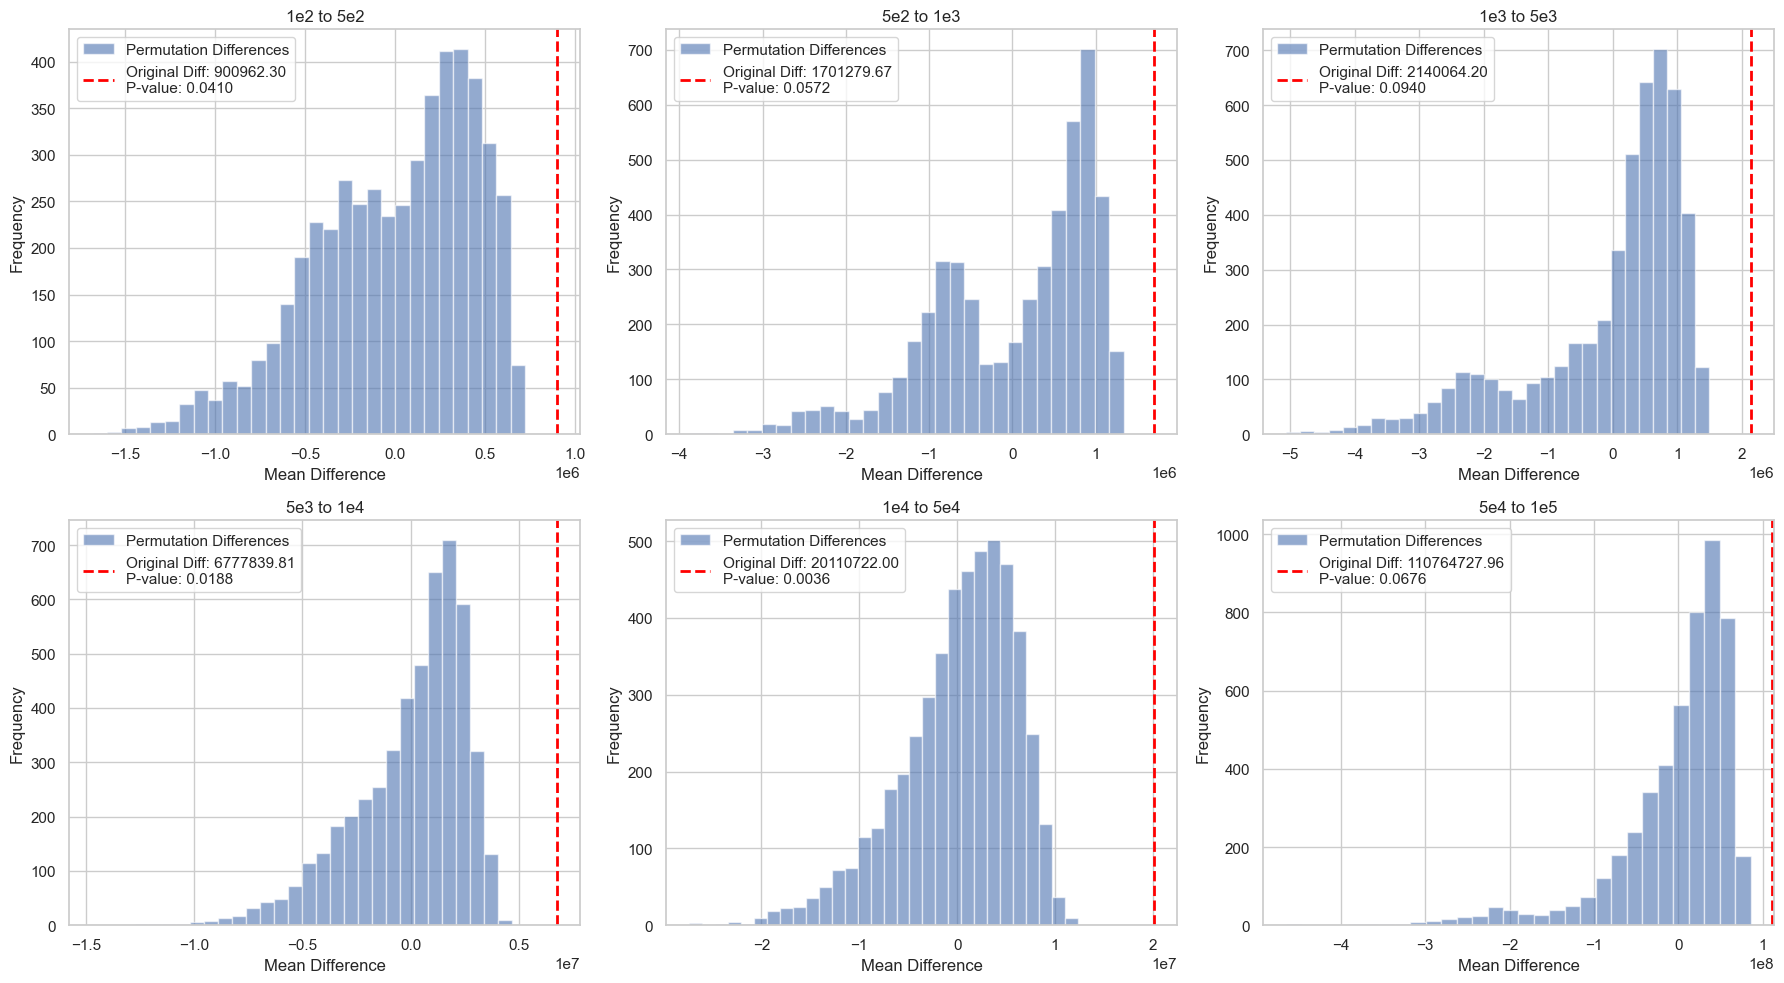

Group 2: Original Diff = 900962.2955016962, P-value = 0.041
Group 3: Original Diff = 1701279.6703597, P-value = 0.0572
Group 4: Original Diff = 2140064.2047216455, P-value = 0.094
Group 5: Original Diff = 6777839.810839528, P-value = 0.0188
Group 6: Original Diff = 20110722.001824245, P-value = 0.0036
Group 7: Original Diff = 110764727.95643452, P-value = 0.0676


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设的DataFrame和difference_lst已经定义
# df = pd.DataFrame(...)
# difference_lst = [...]

n_permutations = 5000
titles = ["1e2 to 5e2", "5e2 to 1e3", "1e3 to 5e3", "5e3 to 1e4", "1e4 to 5e4","5e4 to 1e5"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 调整布局为2行3列
axs = axs.flatten()  # 将子图数组变平，方便遍历
results = []

for i, ax, title in zip(range(2, 8), axs, titles):  # 适应主数据的第2-7个与差异数据的第1-6个匹配
    # 获取主数据集
    data_main = df.loc[df[f"Abundance: F{i}: Sample"] != 0, f"Abundance: F{i}: Sample"]
    
    # 获取差异数据集，根据已经写好的匹配逻辑
    data_difference = df.loc[df['Gene Symbol'].isin(difference_lst[i - 2]), f"Abundance: F{i}: Sample"]
    
    # 计算原始的平均值差异
    original_diff = np.mean(data_main) - np.mean(data_difference) 
    
    # 执行置换测试
    perm_diffs = []
    for _ in range(n_permutations):
        combined_data = np.concatenate((data_main.values, data_difference.values))
        np.random.shuffle(combined_data)
        
        perm_main = combined_data[:len(data_main)]
        perm_difference = combined_data[len(data_main):]
        
        perm_diff = np.mean(perm_main) - np.mean(perm_difference)
        perm_diffs.append(perm_diff)
    
    # 计算p值
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(original_diff))
    
    # 绘制置换分布图并标记原始差异
    ax.hist(perm_diffs, bins=30, alpha=0.6, label='Permutation Differences')
    ax.axvline(x=original_diff, color='red', linestyle='dashed', linewidth=2, label=f'Original Diff: {original_diff:.2f}\nP-value: {p_value:.4f}')
    ax.set_title(title)
    ax.set_xlabel('Mean Difference')
    ax.set_ylabel('Frequency')
    ax.legend()

    # 记录结果
    results.append((i, original_diff, p_value))

plt.tight_layout()  # 调整子图间距
plt.show()

# 打印每组数据的结果
for result in results:
    print(f'Group {result[0]}: Original Diff = {result[1]}, P-value = {result[2]}')


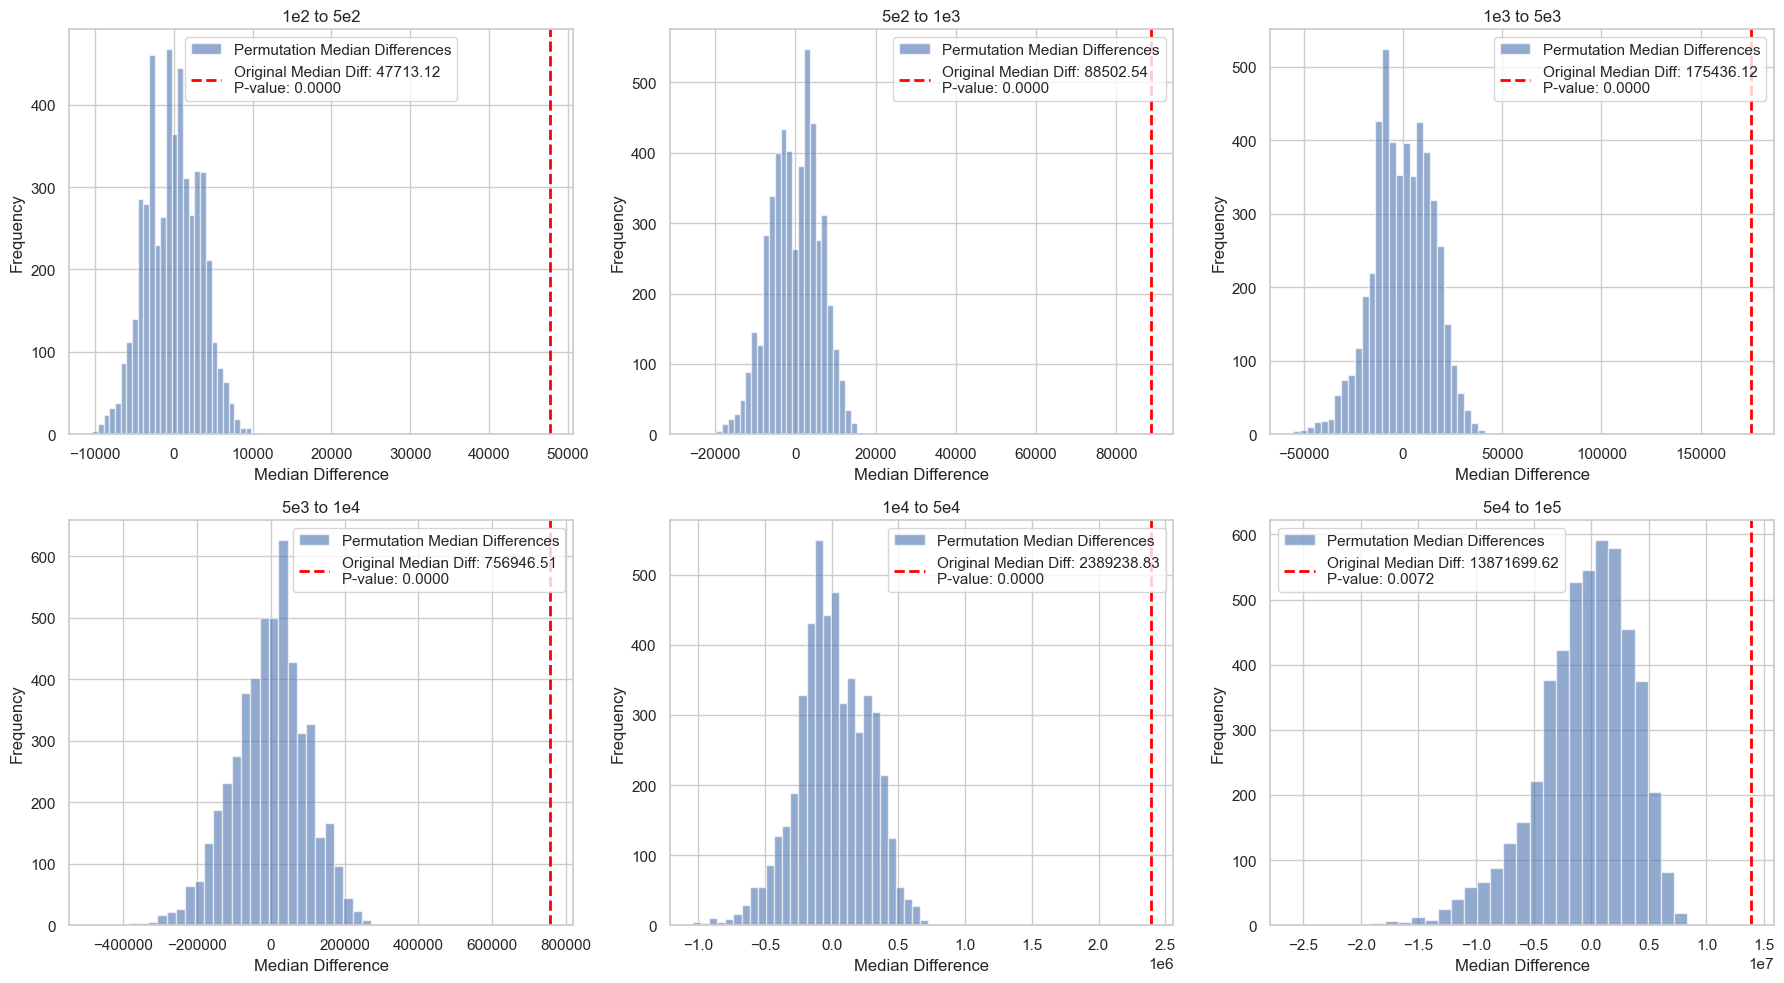

Group 2: Original Median Diff = 47713.1171875, P-value = 0.0
Group 3: Original Median Diff = 88502.541015625, P-value = 0.0
Group 4: Original Median Diff = 175436.12109375, P-value = 0.0
Group 5: Original Median Diff = 756946.505859375, P-value = 0.0
Group 6: Original Median Diff = 2389238.828125, P-value = 0.0
Group 7: Original Median Diff = 13871699.625, P-value = 0.0072


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设的DataFrame和difference_lst已经定义
# df = pd.DataFrame(...)
# difference_lst = [...]

n_permutations = 5000
titles = ["1e2 to 5e2", "5e2 to 1e3", "1e3 to 5e3", "5e3 to 1e4", "1e4 to 5e4", "5e4 to 1e5"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 调整布局为2行3列
axs = axs.flatten()  # 将子图数组变平，方便遍历
results = []

for i, ax, title in zip(range(2, 8), axs, titles):  # 适应主数据的第2-7个与差异数据的第1-6个匹配
    # 获取主数据集
    data_main = df.loc[df[f"Abundance: F{i}: Sample"] != 0, f"Abundance: F{i}: Sample"]
    
    # 获取差异数据集，根据已经写好的匹配逻辑
    data_difference = df.loc[df['Gene Symbol'].isin(difference_lst[i - 2]), f"Abundance: F{i}: Sample"]
    
    # 计算原始的中位数差异
    original_median_diff = np.median(data_main) - np.median(data_difference)
    
    # 执行置换测试
    perm_median_diffs = []
    for _ in range(n_permutations):
        combined_data = np.concatenate((data_main.values, data_difference.values))
        np.random.shuffle(combined_data)
        
        perm_main = combined_data[:len(data_main)]
        perm_difference = combined_data[len(data_main):]
        
        perm_median_diff = np.median(perm_main) - np.median(perm_difference)
        perm_median_diffs.append(perm_median_diff)
    
    # 计算p值
    p_value = np.mean(np.abs(perm_median_diffs) >= np.abs(original_median_diff))
    
    # 绘制置换分布图并标记原始中位数差异
    ax.hist(perm_median_diffs, bins=30, alpha=0.6, label='Permutation Median Differences')
    ax.axvline(x=original_median_diff, color='red', linestyle='dashed', linewidth=2, label=f'Original Median Diff: {original_median_diff:.2f}\nP-value: {p_value:.4f}')
    ax.set_title(title)
    ax.set_xlabel('Median Difference')
    ax.set_ylabel('Frequency')
    ax.legend()

    # 记录结果
    results.append((i, original_median_diff, p_value))

plt.tight_layout()  # 调整子图间距
plt.show()

# 打印每组数据的结果
for result in results:
    print(f'Group {result[0]}: Original Median Diff = {result[1]}, P-value = {result[2]}')
